In [124]:
!pip install imbalanced-learn

In [125]:
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Input,Activation,add,Concatenate ,Dropout
from tensorflow.keras.models import Sequential, Model
from keras import models
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Nadam
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import recall_score, precision_score, f1_score,confusion_matrix, accuracy_score
from imblearn.over_sampling import ADASYN
from keras.models import load_model
from tensorflow.keras.models import save_model

In [126]:
df = pd.read_csv("/content/income_dataset.csv")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


In [127]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
educational-num,int64
marital-status,object
occupation,object
relationship,object
race,object
gender,object


In [128]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [129]:
df = df.dropna()

In [130]:
numerical_df = df.select_dtypes(exclude=['object'])
numerical_df.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K'],
      dtype='object')

<Axes: >

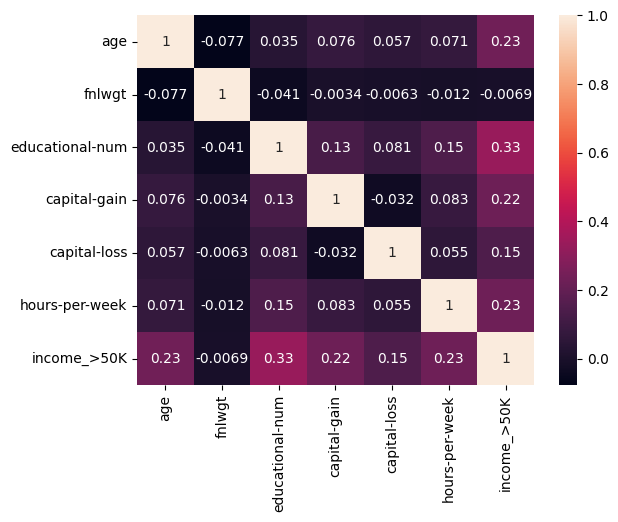

In [131]:
sns.heatmap(numerical_df.corr(), annot = True)

In [ ]:
# Let's encode the categorical columns
l_encoders = {}  # Changed to a dictionary to store multiple encoders
categorical_df = df.select_dtypes(include=['object'])
for col in categorical_df.columns:
    l_encoders[col] = LabelEncoder()
    categorical_df[col] = l_encoders[col].fit_transform(categorical_df[col])
categorical_df.head(10)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,3,10,0,3,1,4,1,38
1,3,2,4,7,3,4,1,38
2,3,9,2,3,0,4,1,38
3,6,5,2,13,0,4,1,38
4,6,15,4,7,1,2,1,38
5,6,11,4,0,3,4,1,38
6,3,6,2,6,5,4,0,38
7,5,9,2,11,0,4,1,23
8,3,11,4,5,1,4,1,38
9,3,11,2,3,0,4,1,38


In [134]:
df = df.drop(categorical_df.columns, axis=1)
df = pd.concat([df, categorical_df], axis=1)
df.head(10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,67,366425,16,99999,0,60,1,3,10,0,3,1,4,1,38
1,17,244602,8,0,0,15,0,3,2,4,7,3,4,1,38
2,31,174201,13,0,0,40,1,3,9,2,3,0,4,1,38
3,58,110199,4,0,0,40,0,6,5,2,13,0,4,1,38
4,25,149248,10,0,0,40,0,6,15,4,7,1,2,1,38
5,59,105363,9,0,0,40,0,6,11,4,0,3,4,1,38
6,70,216390,5,2653,0,40,0,3,6,2,6,5,4,0,38
7,35,361888,13,0,0,60,0,5,9,2,11,0,4,1,23
8,28,74784,9,0,0,50,0,3,11,4,5,1,4,1,38
9,28,118089,9,4386,0,45,1,3,11,2,3,0,4,1,38


In [135]:
df['income_>50K'].value_counts()

,count
income_>50K,
0,33439
1,10518


<Axes: >

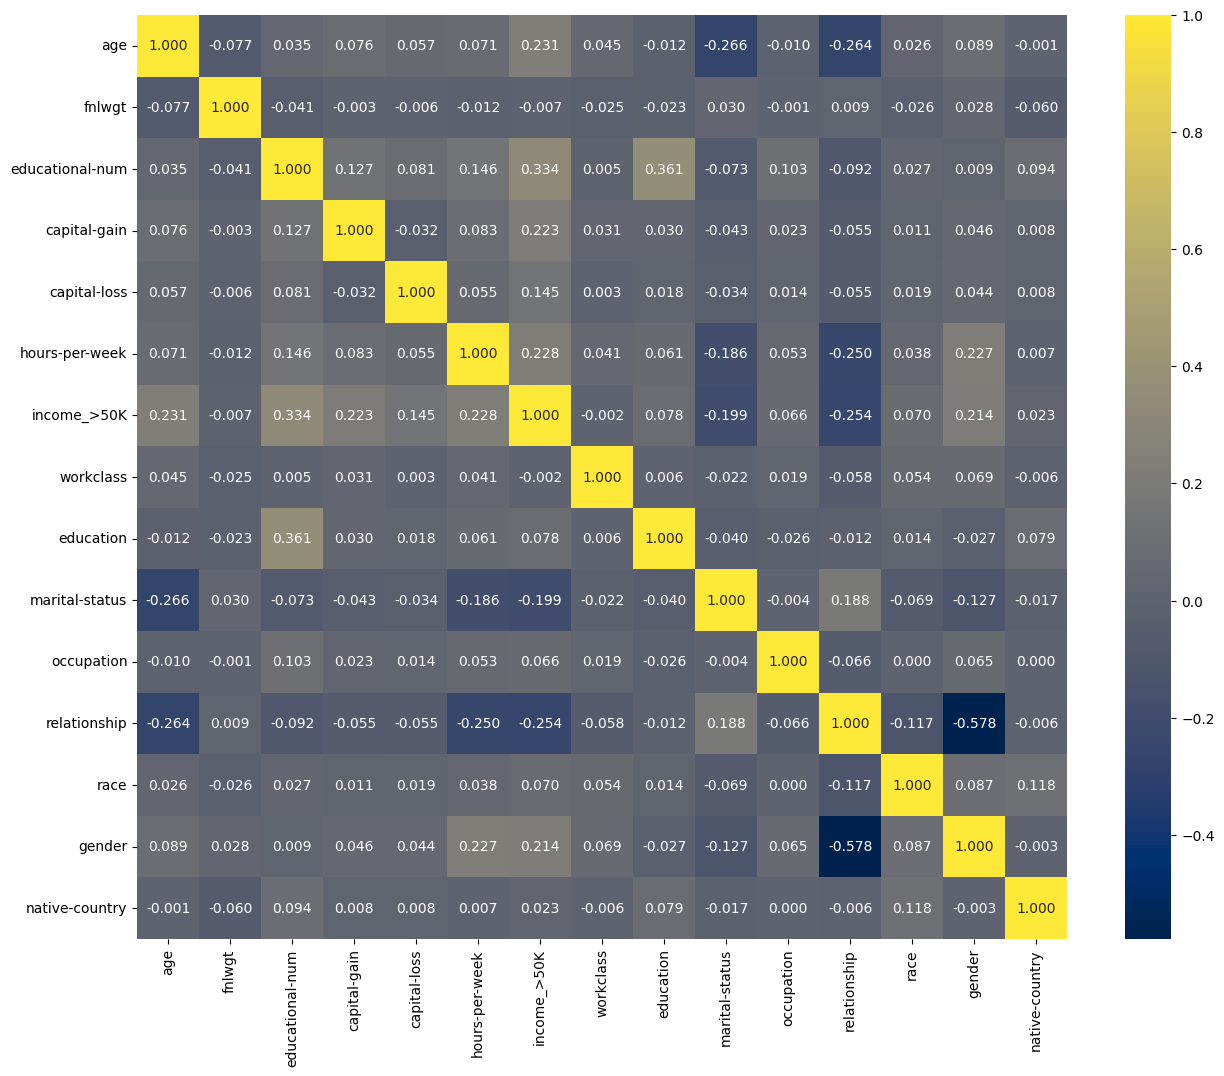

In [136]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='cividis')

In [137]:
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

In [138]:
X = df.drop('income_>50K', axis=1)
y = df['income_>50K']

In [139]:
# Apply ADASYN to generate synthetic samples
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Verify the new class distribution
print("Class distribution after ADASYN:")
print(pd.Series(y_resampled).value_counts())

# Split into training and temporary set (for validation and testing)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# Split the temporary set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Class distribution after ADASYN:
income_>50K
0    33439
1    32988
Name: count, dtype: int64


In [ ]:
for col, encoder in l_encoders.items():
    joblib.dump(encoder, f'label_encoder_{col}.pkl')
    print(f"Saved LabelEncoder for {col} as 'label_encoder_{col}.pkl'")
joblib.dump(scaler, 'standard_scaler.pkl')
print("Saved StandardScaler as 'standard_scaler.pkl'")

In [140]:
def define_model(optimization: str, regularization_datatype, early_stopping: bool, dropout: float, learning_rate: float):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer= optimization,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    return model


In [141]:
def evaluate_model(model, X_test, y_test, model_name="Model", threshold=0.5):
    print(f"\nEvaluating {model_name}...\n")
    # Evaluate loss and accuracy
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    # Predict probabilities
    y_pred = model.predict(X_test)
    # Apply the custom threshold
    y_pred_classes = (y_pred >= threshold).astype(int)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)
    cm = confusion_matrix(y_test, y_pred_classes)

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)

    # Save the model
    model.save(f'{model_name}.keras')
    print(f"Model '{model_name}' saved successfully.")
    print("\nConfusion Matrix:\n", cm)

    # Visualize Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [142]:
def loss_curve_plot(model, history,X_test, model_name="Model"):
    #  Plot Loss Curve
    epochs = range(1, len(history.history['loss']) + 1)
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r*-', label='Validation Loss')
    plt.title(f'{model_name} - Training & Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

In [143]:
model_1 = define_model('adam', None, False, 0.0, 0.0)
history_1 = model_1.fit(X_train, y_train,
                         batch_size=32,
                          validation_data=(X_val, y_val),
                          verbose=1,
                          epochs=20);

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1454/1454 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7943 - loss: 0.4359 - val_accuracy: 0.8416 - val_loss: 0.3578
Epoch 2/20
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8415 - loss: 0.3553 - val_accuracy: 0.8440 - val_loss: 0.3446
Epoch 3/20
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8463 - loss: 0.3395 - val_accuracy: 0.8435 - val_loss: 0.3374
Epoch 4/20
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8536 - loss: 0.3241 - val_accuracy: 0.8476 - val_loss: 0.3357
Epoch 5/20
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8542 - loss: 0.3186 - val_accuracy: 0.8531 - val_loss: 0.3236
Epoch 6/20
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8608 - loss: 0.3058 - val_accuracy: 0.8552 - val_loss: 0.3159
Epoch 7/20
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8638 - loss: 0.2969 - val_accuracy: 0.8603 - val_loss: 0.3080
Epoch 8/20
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8705 - loss: 0.2857 - val_accur


Evaluating Model 1...

312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8716
Recall: 0.8833
Precision: 0.8636
F1-score: 0.8733
Confusion Matrix:
[[4272  697]
 [ 583 4413]]
Model 'Model 1' saved successfully.

Confusion Matrix:
 [[4272  697]
 [ 583 4413]]


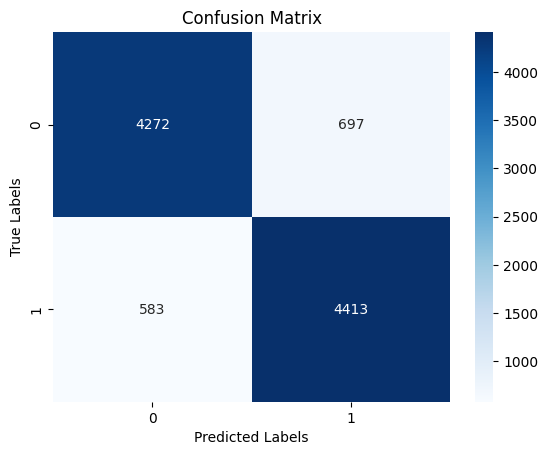

In [144]:
evaluate_model(model_1, X_test, y_test, model_name="Model 1")

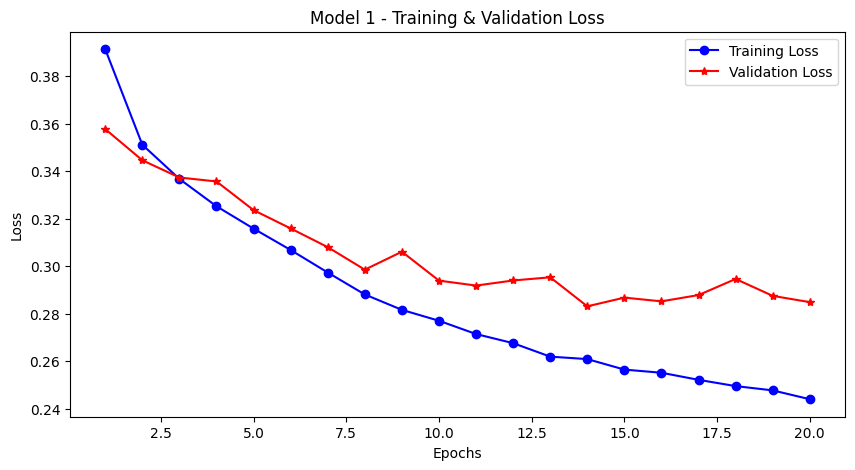

In [145]:
loss_curve_plot(model_1, history_1, X_test, model_name="Model 1")

In [146]:
model_2 = define_model('RMSprop', l2, False, 0.5, 0.01)
history_2 = model_2.fit(X_train, y_train,
                         batch_size=32,
                          validation_data=(X_val, y_val),
                          verbose=1,
                          epochs=30);

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1454/1454 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8017 - loss: 0.4231 - val_accuracy: 0.8358 - val_loss: 0.3647
Epoch 2/30
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8369 - loss: 0.3596 - val_accuracy: 0.8429 - val_loss: 0.3526
Epoch 3/30
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8430 - loss: 0.3475 - val_accuracy: 0.8470 - val_loss: 0.3444
Epoch 4/30
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8509 - loss: 0.3329 - val_accuracy: 0.8512 - val_loss: 0.3323
Epoch 5/30
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8515 - loss: 0.3301 - val_accuracy: 0.8501 - val_loss: 0.3453
Epoch 6/30
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8545 - loss: 0.3228 - val_accuracy: 0.8532 - val_loss: 0.3246
Epoch 7/30
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8593 - loss: 0.3166 - val_accuracy: 0.8570 - val_loss: 0.3173
Epoch 8/30
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8660 - loss: 0.3087 - val_accur


Evaluating Model 2...

312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8647
Recall: 0.8927
Precision: 0.8460
F1-score: 0.8687
Confusion Matrix:
[[4157  812]
 [ 536 4460]]
Model 'Model 2' saved successfully.

Confusion Matrix:
 [[4157  812]
 [ 536 4460]]


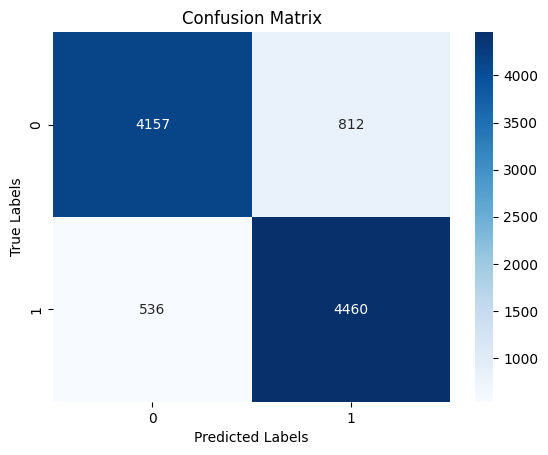

In [147]:
evaluate_model(model_2, X_test, y_test, model_name="Model 2")

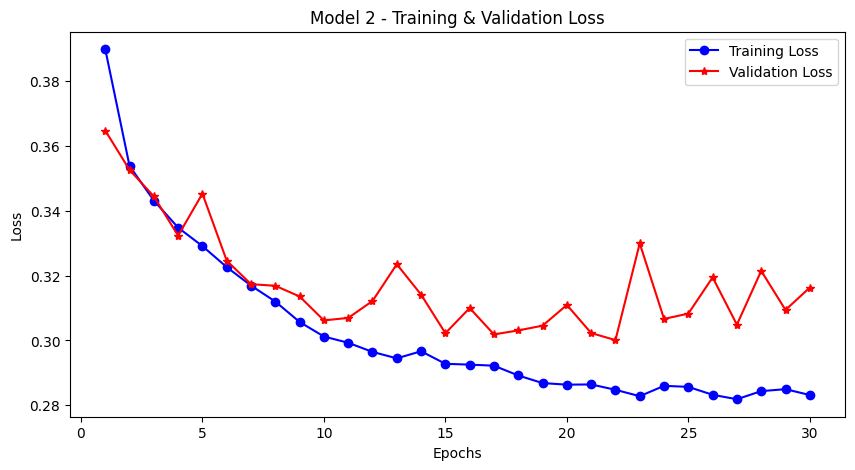

In [148]:
loss_curve_plot(model_2, history_2, X_test, model_name="Model 2")

In [149]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [150]:
model_3 = define_model('Nadam', l2(0.05), True, 0.05, 0.01)
history_3 = model_3.fit(X_train, y_train,
                         batch_size=32,
                          validation_data=(X_val, y_val),
                          callbacks=[early_stopping],
                          verbose=1,
                          epochs=50);

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1454/1454 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7970 - loss: 0.4320 - val_accuracy: 0.8404 - val_loss: 0.3568
Epoch 2/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8418 - loss: 0.3506 - val_accuracy: 0.8453 - val_loss: 0.3433
Epoch 3/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8489 - loss: 0.3364 - val_accuracy: 0.8465 - val_loss: 0.3377
Epoch 4/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8495 - loss: 0.3236 - val_accuracy: 0.8470 - val_loss: 0.3339
Epoch 5/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8565 - loss: 0.3217 - val_accuracy: 0.8568 - val_loss: 0.3232
Epoch 6/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8599 - loss: 0.3050 - val_accuracy: 0.8560 - val_loss: 0.3107
Epoch 7/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8625 - loss: 0.2979 - val_accuracy: 0.8612 - val_loss: 0.3097
Epoch 8/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8659 - loss: 0.2904 - val_accur


Evaluating Model 3...

312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.8668
Recall: 0.8871
Precision: 0.8531
F1-score: 0.8698
Confusion Matrix:
[[4206  763]
 [ 564 4432]]
Model 'Model 3' saved successfully.

Confusion Matrix:
 [[4206  763]
 [ 564 4432]]


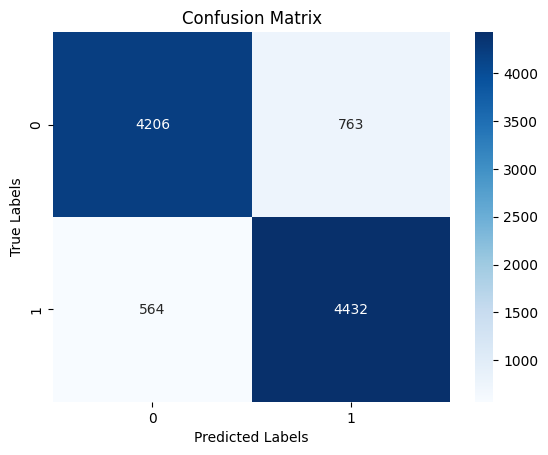

In [151]:
evaluate_model(model_3, X_test, y_test, model_name="Model 3")

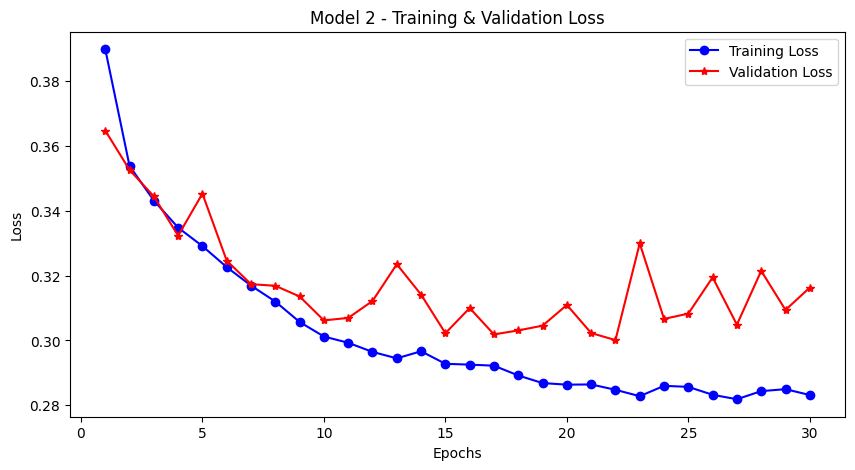

In [152]:
loss_curve_plot(model_2, history_2, X_test, model_name="Model 2")